In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('day.csv',index_col=0)

In [3]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [7]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
df['season']=df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})

In [9]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [10]:
df['dteday']=pd.to_datetime(df['dteday'])

In [11]:
df['mnth']=df['mnth'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:"july",8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [12]:
df['mnth'].value_counts()

jan     62
mar     62
oct     62
aug     62
may     62
dec     62
july    62
sep     60
apr     60
june    60
nov     60
feb     56
Name: mnth, dtype: int64

In [13]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [14]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [15]:
df['weekday']=df['weekday'].replace({0:'tue',1:'wed',2:'thur',3:'fri',4:'sat',5:'sun',6:'mon'})

In [16]:
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [17]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [18]:
df['weathersit']=df['weathersit'].replace({1:'A',2:'B',3:'C'})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

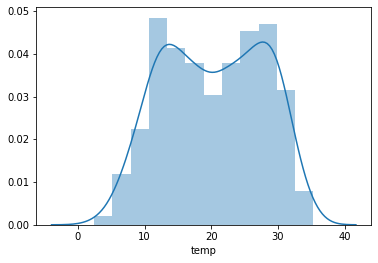

In [20]:
sns.distplot(df['temp'])
plt.show()

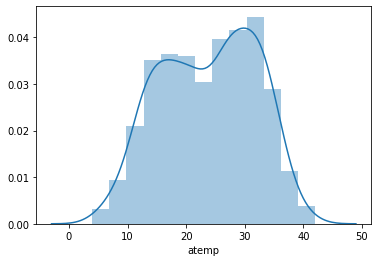

In [21]:
sns.distplot(df['atemp'])
plt.show()

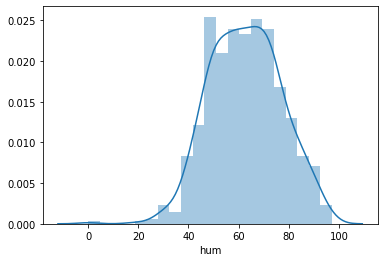

In [22]:
sns.distplot(df['hum'])
plt.show()

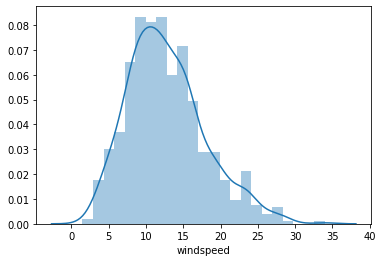

In [23]:
sns.distplot(df['windspeed'])
plt.show()

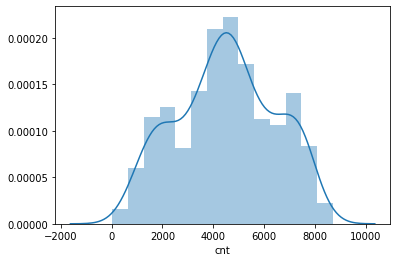

In [24]:
sns.distplot(df['cnt'])
plt.show()

In [25]:
df_categorical=df.select_dtypes('object')

In [26]:
df_categorical

,season,mnth,weekday,weathersit
instant,,,,
1,spring,jan,mon,B
2,spring,jan,tue,B
3,spring,jan,wed,A
4,spring,jan,thur,A
5,spring,jan,fri,A
...,...,...,...,...
726,spring,dec,sat,B
727,spring,dec,sun,B
728,spring,dec,mon,B


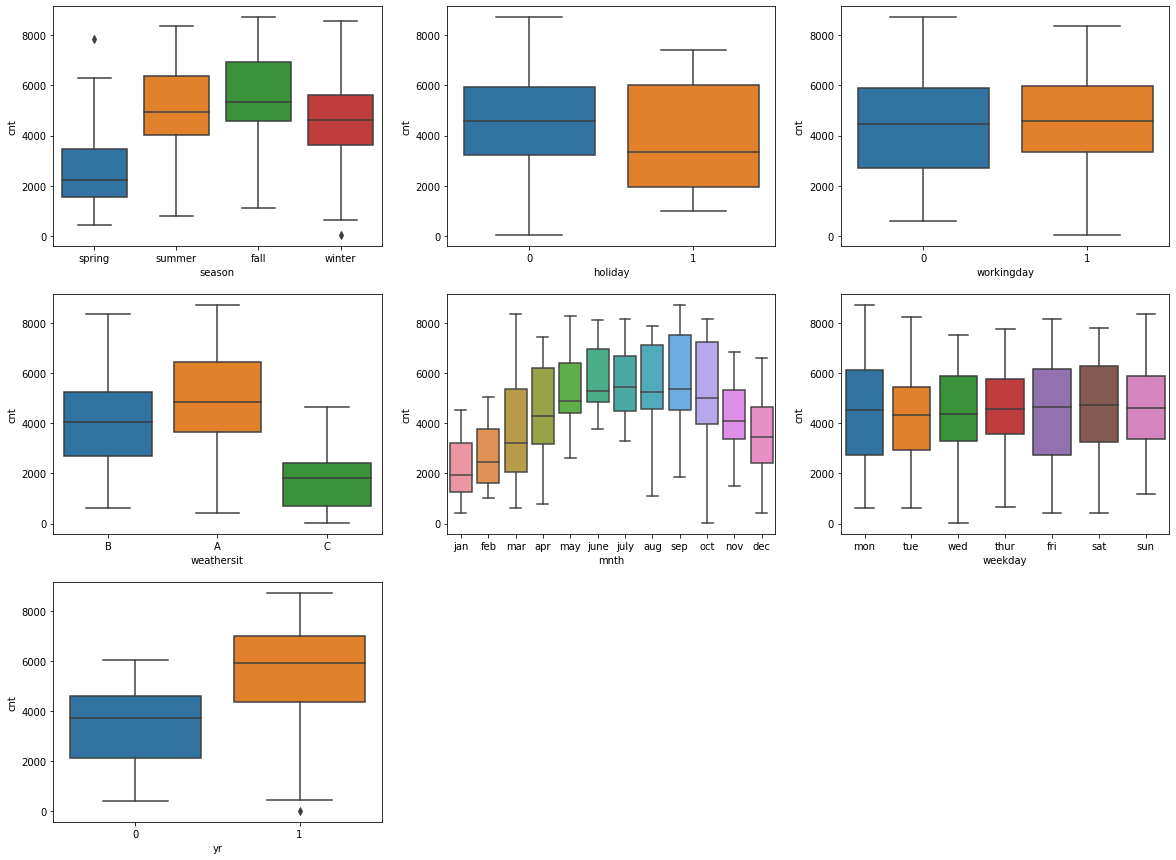

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x=df_categorical['season'],y=df['cnt'])
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt',data=df)
plt.show()

In [28]:
df_numeric=df.select_dtypes(include=['float64','int64'])

In [29]:
df_numeric.drop(columns=['yr', 'holiday', 'workingday'],axis=1,inplace=True)

C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


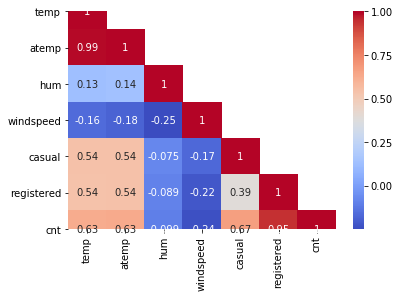

In [30]:
#plt.figure(figsize=(6,5))
mask=np.array(df_numeric.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(df_numeric.corr(),annot=True,mask=mask,cmap='coolwarm')
plt.show()

In [31]:
# atemp and temp are highly correlated

In [32]:
df_numeric.drop('atemp',axis=1,inplace=True)

In [33]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   hum         730 non-null    float64
 2   windspeed   730 non-null    float64
 3   casual      730 non-null    int64  
 4   registered  730 non-null    int64  
 5   cnt         730 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 59.9 KB


In [34]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True)

In [35]:
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.drop(columns=df_categorical.columns,axis=1,inplace=True)

In [37]:
df=pd.concat([df,df_dummies],axis=1)

In [38]:
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   atemp          730 non-null    float64       
 6   hum            730 non-null    float64       
 7   windspeed      730 non-null    float64       
 8   casual         730 non-null    int64         
 9   registered     730 non-null    int64         
 10  cnt            730 non-null    int64         
 11  season_spring  730 non-null    uint8         
 12  season_summer  730 non-null    uint8         
 13  season_winter  730 non-null    uint8         
 14  mnth_aug       730 non-null    uint8         
 15  mnth_dec       730 non-

In [40]:
df.drop(columns=['dteday','atemp'],axis=1,inplace=True)

In [41]:
X=df.drop('cnt',axis=1)

In [42]:
y=df['cnt']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=60)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler=MinMaxScaler()

In [47]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thur',
       'weekday_tue', 'weekday_wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [48]:
X_train[['temp','hum','windspeed','casual']]=scaler.fit_transform(X_train[['temp','hum','windspeed','casual']])

C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [49]:
X_test[['temp','hum','windspeed','casual']]=scaler.transform(X_test[['temp','hum','windspeed','casual']])

C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
model=GradientBoostingRegressor()

In [52]:
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
model.score(X_test,y_test)

0.9962998306488466

In [54]:
model.score(X_train,y_train)

0.9991938223458489

In [55]:
# since there is no overfitting. So,our model is good enough